In [14]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import time

In [15]:
model = 'model.onnx'
net = cv2.dnn.readNetFromONNX(model)

In [16]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [17]:
def emotion(image,returndata=False):
    
    img_copy = image.copy()
    # Detect faces in image
    faces = face_cascade.detectMultiScale(img_copy, 1.1, 4)
    # Define padding for face ROI
    padding = 3 
    
    # Iterate process for all detected faces
    for x,y,w,h in faces:
        
        # Get the Face from image
        face = img_copy[y-padding:y+h+padding,x-padding:x+w+padding]
        
        # Convert the detected face from BGR to Gray scale
        gray = cv2.cvtColor(face,cv2.COLOR_BGR2GRAY)
        
        # Resize the gray scale image into 64x64
        resized_face = cv2.resize(gray, (48, 48))
        
        # Reshape the final image in required format of model
        processed_face = resized_face.reshape(1,1,48,48)
        
        # Input the processed image
        net.setInput(processed_face)
        
        # Forward pass
        Output = net.forward()
        print("Output = ", Output)
        
        # Get the final probablities by getting rid of any extra dimensions 
        prob = np.squeeze(Output)
        print("Squeezed Output = ", prob)
        
        # Get the predicted emotion
        predicted_emotion = emotions[prob.argmax()]
       
        # Write predicted emotion on image
        cv2.putText(img_copy,'{}'.format(predicted_emotion),(x,y+h+(1*20)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,255), 
                        2, cv2.LINE_AA)
        # Draw a rectangular box on the detected face
        cv2.rectangle(img_copy,(x,y),(x+w,y+h),(0,0,255),2)
    
    if  returndata:
        # Return the the final image if return data is True
        return img_copy
 
    else:
        # Displpay the image
        plt.figure(figsize=(10,10))
        plt.imshow(img_copy[:,:,::-1]);plt.axis("off");     

In [18]:
def init_emotion(model="model.onnx"):
    
    # Set global variables
    global net,emotions
    
    # Define the emotions
    emotions = ['Angry', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    
    # Initialize the DNN module
    net = cv2.dnn.readNetFromONNX(model)

In [19]:
init_emotion()

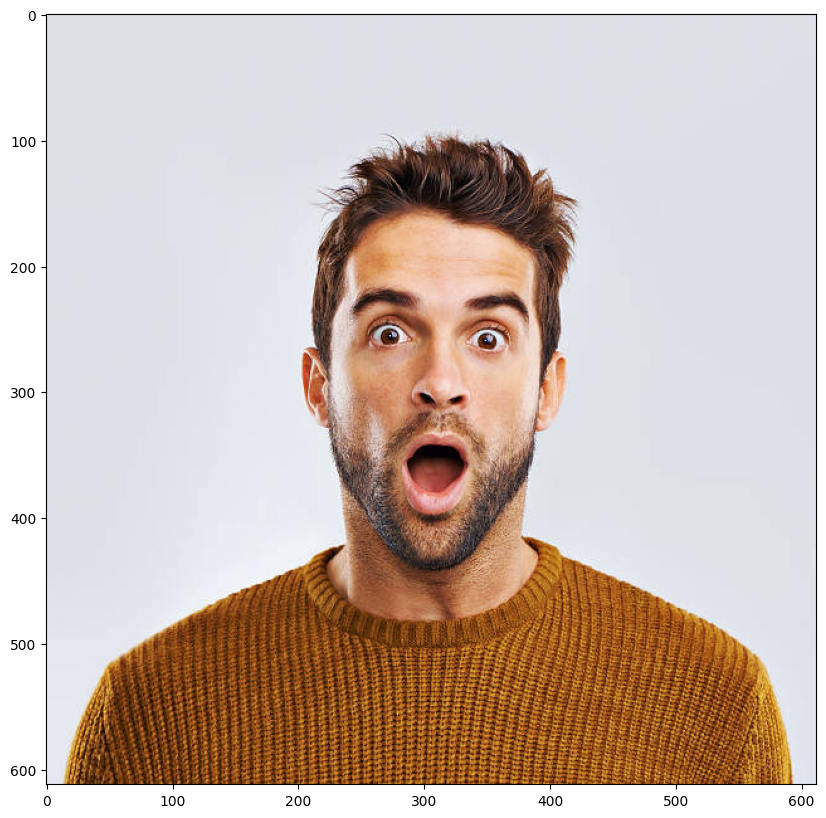

In [20]:
image = cv2.imread("surprised.jpg")
 
# Display image
plt.figure(figsize=[10,10])
plt.imshow(image[:,:,::-1])

Output =  [[0.04359753 0.20224482 0.01371043 0.02045398 0.48892993 0.23106329]]
Squeezed Output =  [0.04359753 0.20224482 0.01371043 0.02045398 0.48892993 0.23106329]


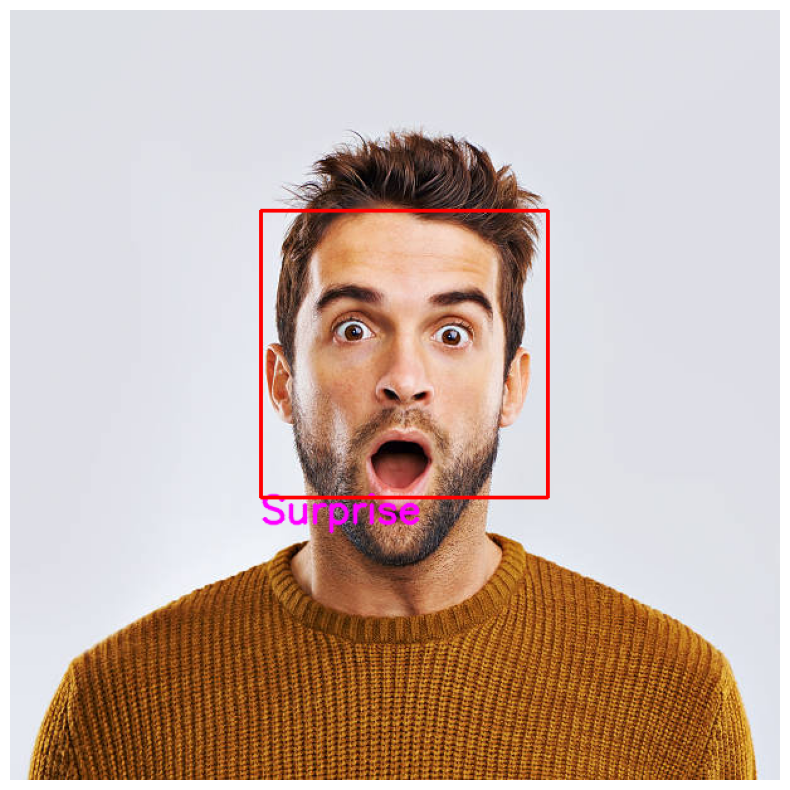

In [21]:
emotion(image)

Output =  [[2.9371205e-07 9.2813872e-09 2.4383800e-08 4.5692033e-10 6.9191852e-10
  9.9999964e-01]]
Squeezed Output =  [2.9371205e-07 9.2813872e-09 2.4383800e-08 4.5692033e-10 6.9191852e-10
 9.9999964e-01]


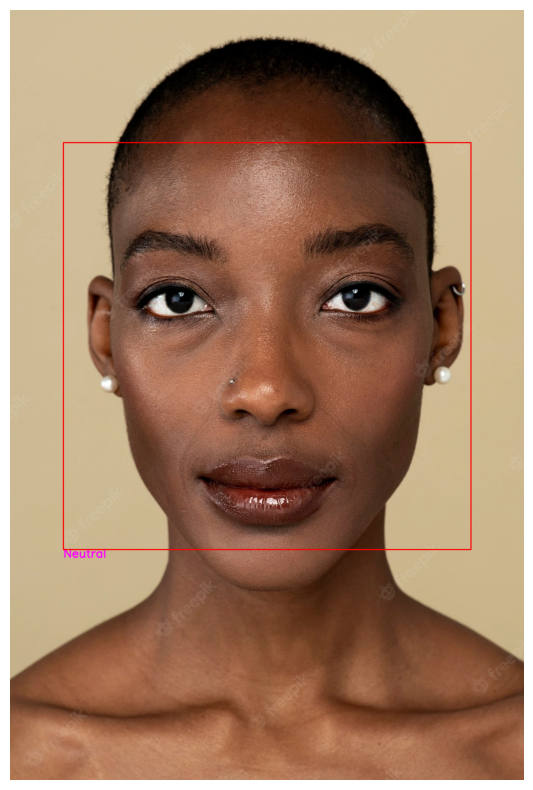

In [22]:
neutral = cv2.imread("neutral2.jpg")
emotion(neutral)

Output =  [[8.0242410e-04 5.0753401e-06 9.9894506e-01 3.2315447e-06 8.3504150e-05
  1.6076394e-04]]
Squeezed Output =  [8.0242410e-04 5.0753401e-06 9.9894506e-01 3.2315447e-06 8.3504150e-05
 1.6076394e-04]


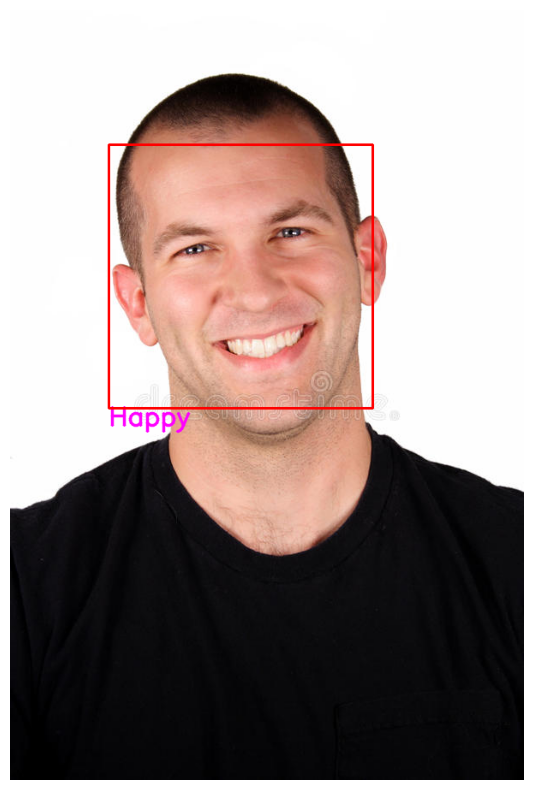

In [103]:
happy = cv2.imread("happy.jpg")
emotion(happy)

Output =  [[1.4619542e-07 4.9223840e-01 3.4928800e-07 4.0663214e-10 5.0776106e-01
  8.0354001e-10]]
Squeezed Output =  [1.4619542e-07 4.9223840e-01 3.4928800e-07 4.0663214e-10 5.0776106e-01
 8.0354001e-10]


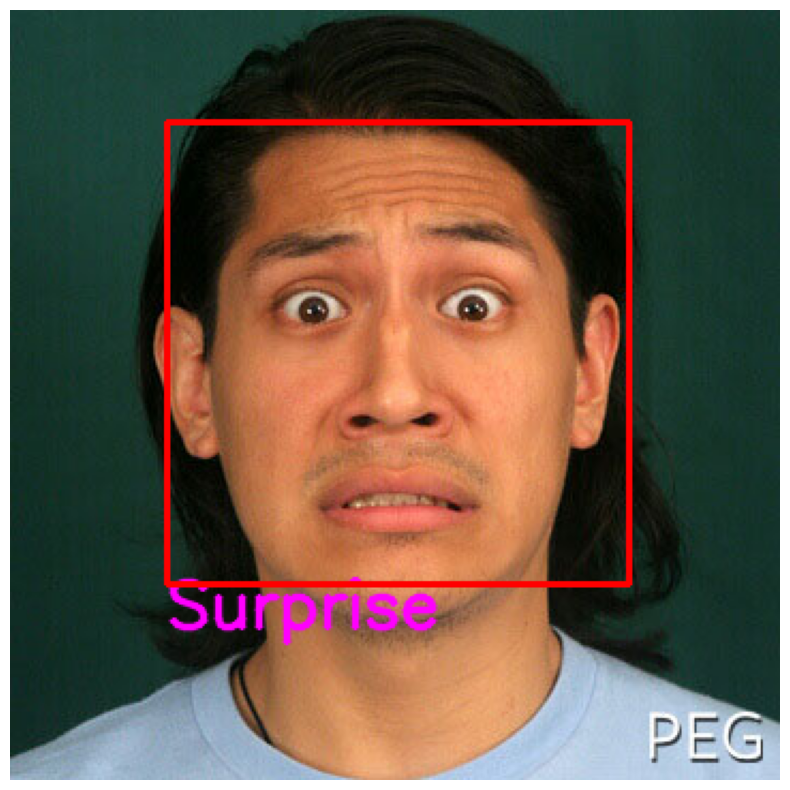

In [23]:
fear = cv2.imread("fear.jpg")
emotion(fear)

Output =  [[0.1500707  0.09726431 0.03162144 0.1368316  0.06931738 0.51489455]]
Squeezed Output =  [0.1500707  0.09726431 0.03162144 0.1368316  0.06931738 0.51489455]


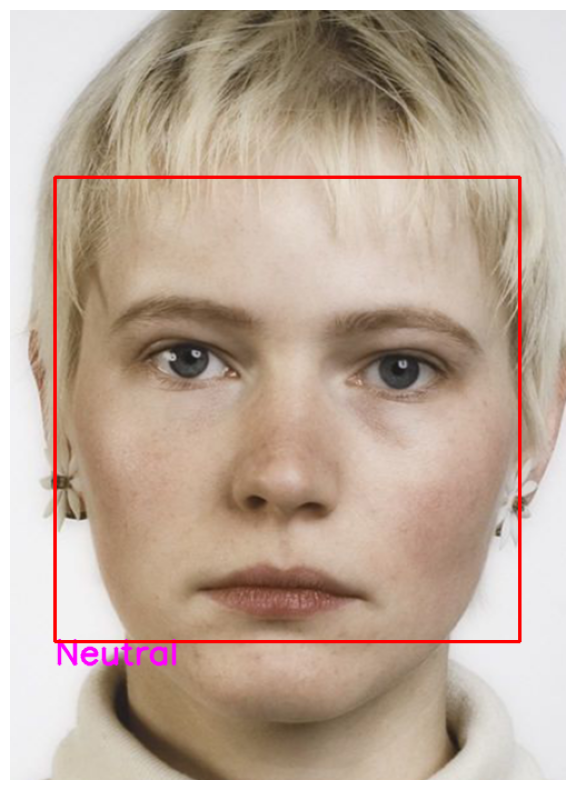

In [105]:
neutral2 = cv2.imread("neutral.png")
emotion(neutral2)

Output =  [[0.2547491  0.25289503 0.03321158 0.32573855 0.07342931 0.05997648]]
Squeezed Output =  [0.2547491  0.25289503 0.03321158 0.32573855 0.07342931 0.05997648]


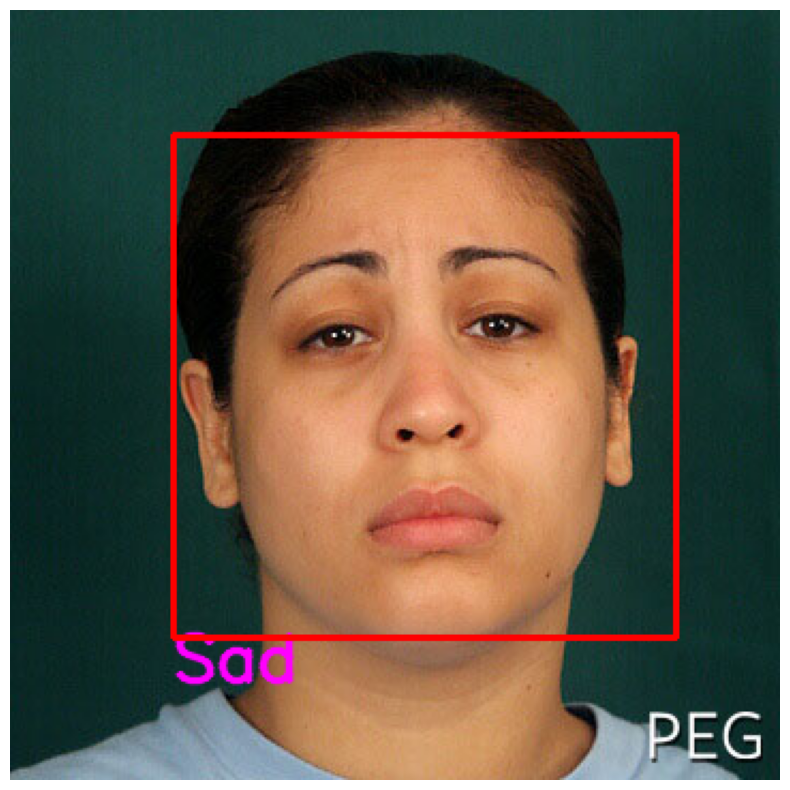

In [106]:
sad = cv2.imread("sad.jpg")
emotion(sad)